In [1]:
%matplotlib inline

# 从vnpy中加载CTA回测模块中的组件
from vnpy.trader.app.ctaStrategy.ctaBacktesting import BacktestingEngine, OptimizationSetting, MINUTE_DB_NAME

# 从当前目录加载策略类代码
from strategyBollingerBot import BollingerBotStrategy

In [2]:
# 创建回测引擎对象
engine = BacktestingEngine()

In [3]:
# 设置回测使用的数据
engine.setBacktestingMode(engine.BAR_MODE)    # 设置引擎的回测模式为K线
engine.setDatabase(MINUTE_DB_NAME, 'IF0000')  # 设置使用的历史数据库
engine.setStartDate('20100101')               # 设置回测用的数据起始日期

In [4]:
# 配置回测引擎参数
engine.setSlippage(0.2)     # 设置滑点为股指1跳
engine.setRate(0.3/10000)   # 设置手续费万0.3
engine.setSize(300)         # 设置股指合约大小 
engine.setPriceTick(0.2)    # 设置股指最小价格变动   
engine.setCapital(300000)  # 设置回测本金

In [5]:
# 在引擎中创建策略对象

# 使用策略类中的默认参数，则参数配置字典留空
d = {}

# 使用优化后的参数
"""
d = {
    'bollLength':32,         # 通道窗口数
    'entryDev':2.4,          # 开仓偏差
    'exitDev':1.2,           # 平仓偏差
    'trailingPrcnt':0.4,     # 移动止损百分比
    'maLength':14,           # 过滤用均线窗口
    'initDays':10,           # 初始化数据所用的天数
    'fixedSize':1            # 每次交易的数量
}  
"""

# 初始化策略
engine.initStrategy(BollingerBotStrategy, d)    

In [6]:
# 运行回测
engine.runBacktesting()          # 运行回测

2017-07-29 12:55:39.169000	开始载入数据
2017-07-29 12:55:39.266000	载入完成，数据量：463950
2017-07-29 12:55:39.266000	开始回测
2017-07-29 12:55:39.266000	策略初始化完成
2017-07-29 12:55:39.266000	策略启动完成
2017-07-29 12:55:39.266000	开始回放数据
2017-07-29 12:55:47.725000	数据回放结束


2017-07-29 12:55:51.067000	计算按日统计结果
2017-07-29 12:55:51.113000	------------------------------
2017-07-29 12:55:51.113000	首个交易日：	2010-04-16
2017-07-29 12:55:51.113000	最后交易日：	2017-07-14
2017-07-29 12:55:51.113000	总交易日：	1761
2017-07-29 12:55:51.113000	盈利交易日	390
2017-07-29 12:55:51.113000	亏损交易日：	600
2017-07-29 12:55:51.113000	起始资金：	300000
2017-07-29 12:55:51.113000	结束资金：	766,458.92
2017-07-29 12:55:51.113000	总收益率：	155.49
2017-07-29 12:55:51.113000	总盈亏：	466,458.92
2017-07-29 12:55:51.113000	最大回撤: 	-97,576.89
2017-07-29 12:55:51.113000	总手续费：	52,841.08
2017-07-29 12:55:51.113000	总滑点：	121,860.0
2017-07-29 12:55:51.113000	总成交金额：	1,761,369,240.0
2017-07-29 12:55:51.113000	总成交笔数：	2,031.0
2017-07-29 12:55:51.113000	日均盈亏：	264.88
2017-07-29 12:55:51.113000	日均手续费：	30.01
2017-07-29 12:55:51.113000	日均滑点：	69.2
2017-07-29 12:55:51.113000	日均成交金额：	1,000,209.68
2017-07-29 12:55:51.113000	日均成交笔数：	1.15
2017-07-29 12:55:51.113000	日均收益率：	0.05%
2017-07-29 12:55:51.113000	收益标准差：	0.99%
2017-07-29 12:55:51.113000	S

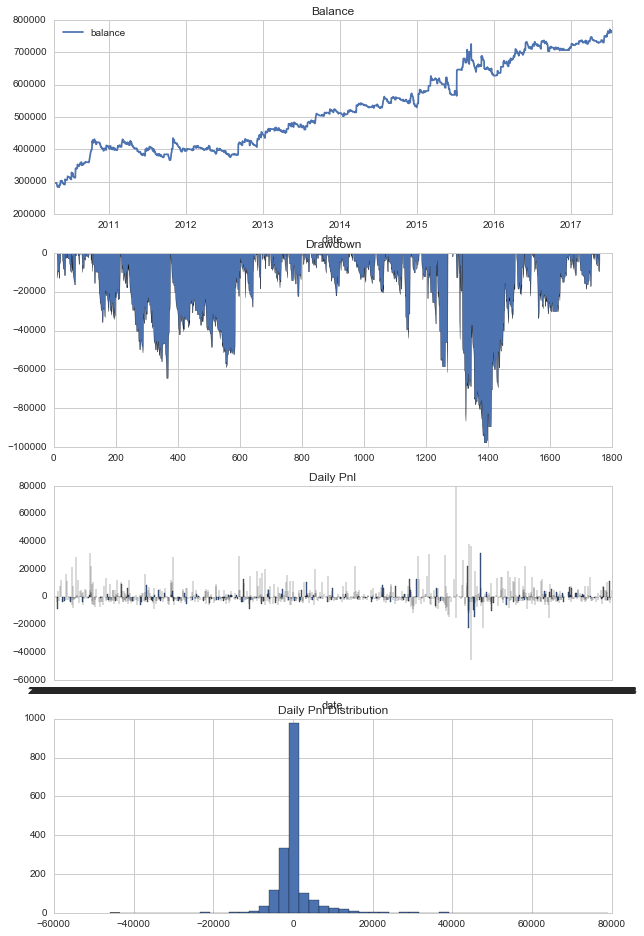

In [7]:
# 显示逐日回测结果
df = engine.showDailyResult()

In [ ]:
# 显示逐笔回测结果，和逐日回测的统计逻辑不同，因此可以用来检查结果是否正确
engine.showBacktestingResult()

In [ ]:
# 显示前50条成交记录
for i in range(50):
    d = engine.tradeDict[str(i+1)].__dict__
    print u'时间%s, 成交编号：%s，方向：%s，开平：%s，数量：%s，价格：%s' %(d['tradeTime'], d['tradeID'], d['direction'], 
                                                                            d['offset'], d['volume'], d['price'])

In [ ]:
# 优化配置
setting = OptimizationSetting()                 # 新建一个优化任务设置对象
setting.setOptimizeTarget('capital')            # 设置优化排序的目标是策略净盈利

setting.addParameter('bollLength', 20, 40, 2)  # 设置参数优化范围
#setting.addParameter('bollLength', 32)          # 设置参数优化值

#setting.addParameter('entryDev', 2, 4, 0.2)  
#setting.addParameter('entryDev', 2.4)  

#setting.addParameter('exitDev', 0, 2, 0.2)
#setting.addParameter('exitDev', 1.2)

#setting.addParameter('trailingPrcnt', 0.2, 1, 0.2)
#setting.addParameter('maLength', 2, 20, 2)

# 执行多进程优化
import time
start = time.time()
engine.runParallelOptimization(BollingerBotStrategy, setting)
print u'耗时：%s' %(time.time()-start)